# Author :- Yashodatta Patil
## Task :- Youtube Streamer Analysis
**Intern Career Data scientist Internship**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("D:\Intern career\youtubers_df.csv")

In [3]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
df.shape

(1000, 9)

### DATA CLEANING AND EXPLORATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [6]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [7]:
df.rename(columns={'Suscribers' : 'Subscribers'}, inplace= True)

In [8]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [9]:
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [10]:
df['Categories'].fillna('Unknow', inplace= True)

In [11]:
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

### CHECK FOR OUTLIERS 

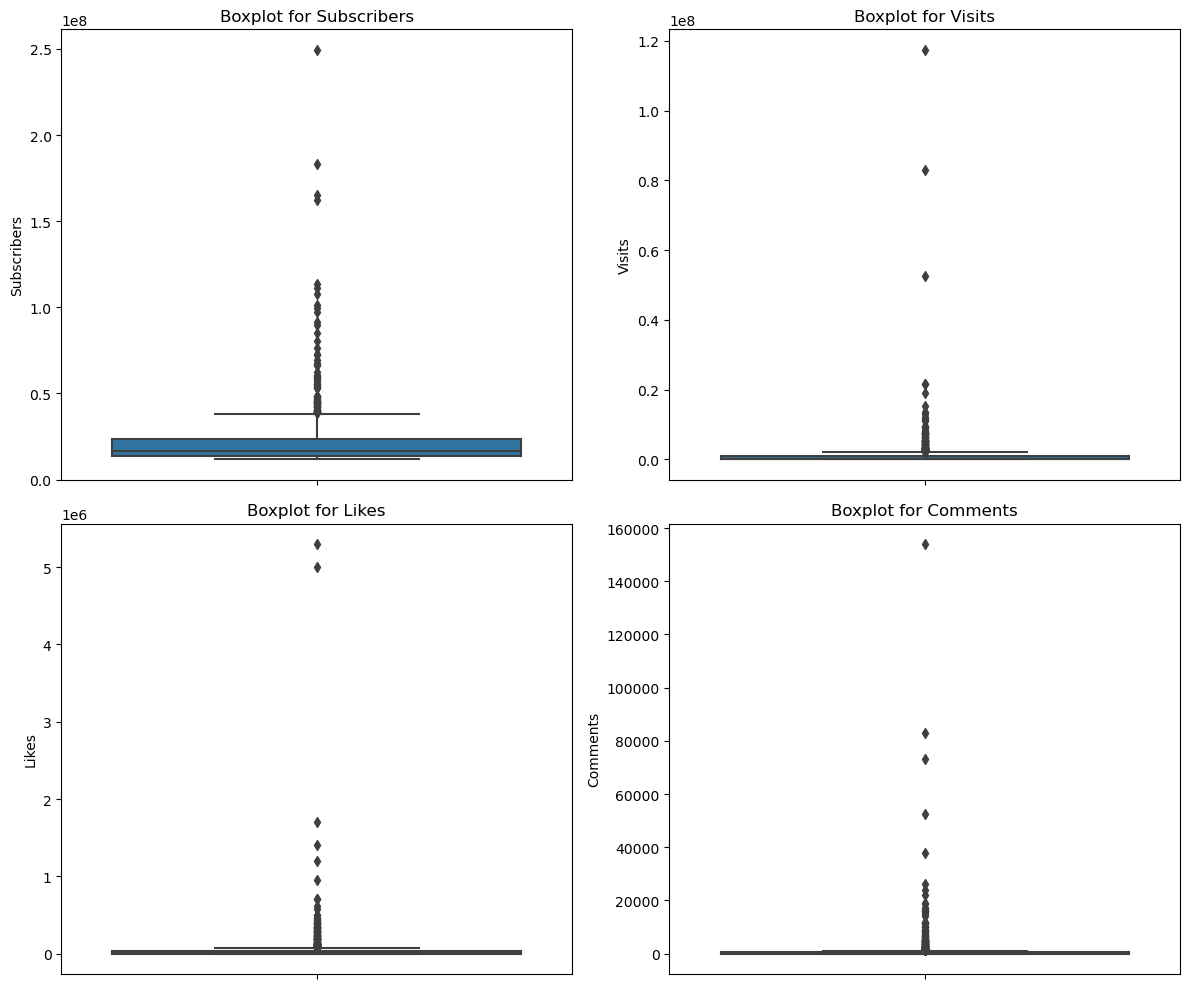

In [12]:
outliers = ['Subscribers','Visits','Likes','Comments']


fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes = axes.flatten()


for i, col in enumerate (outliers):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

### HANDLING OUTLIERS

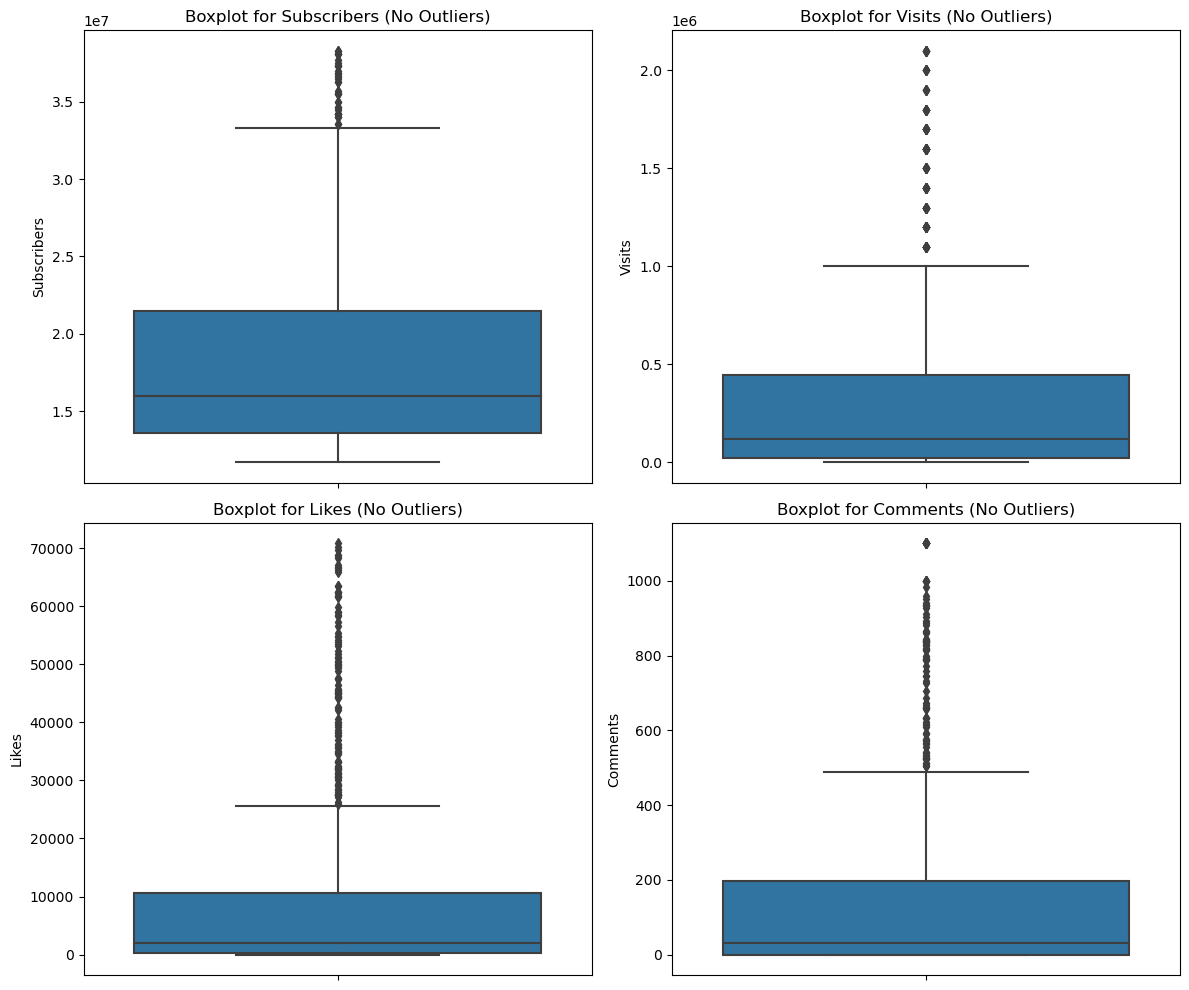

In [13]:

columns_to_check = ['Subscribers', 'Visits', 'Likes', 'Comments']


fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes = axes.flatten()


for i, col in enumerate(columns_to_check):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    sns.boxplot(y=df_no_outliers[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col} (No Outliers)')


plt.tight_layout()
plt.show()

### Trend Analysis

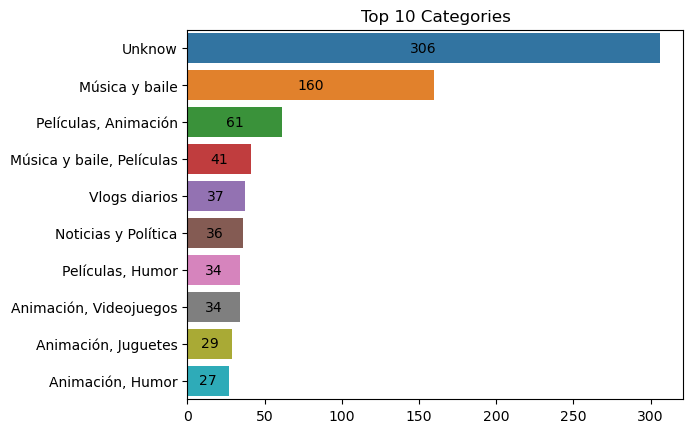

In [14]:
# Identify trends in categories
category_trends = df['Categories'].value_counts().head(10)
ax= sns.barplot(y= category_trends.index, x = category_trends.values)
ax.bar_label(ax.containers[0], label_type="center")
plt.title('Top 10 Categories')
plt.show()

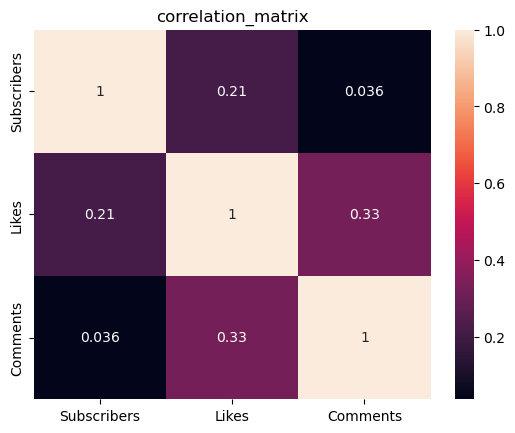

In [15]:
#correlation analysis
correlation_matrix = df[['Subscribers','Likes','Comments']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation_matrix')
plt.show()

### Audience Study

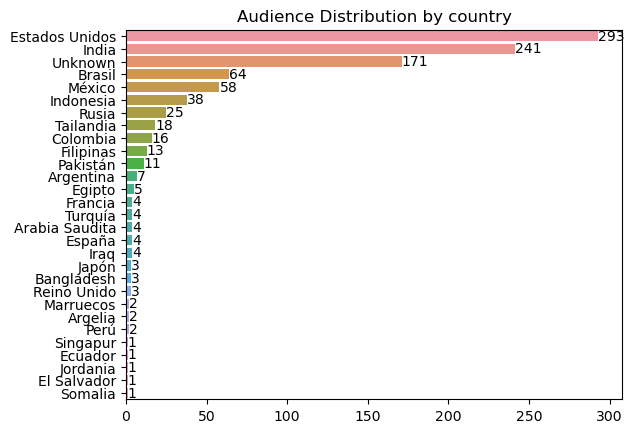

In [16]:
#Analyze distribution of audiences by country
country_distribution = df['Country'].value_counts()
yx= sns.barplot(y= country_distribution.index, x= country_distribution.values )
yx.bar_label(yx.containers[0])
plt.title('Audience Distribution by country')
plt.show()

### Performance Metrics

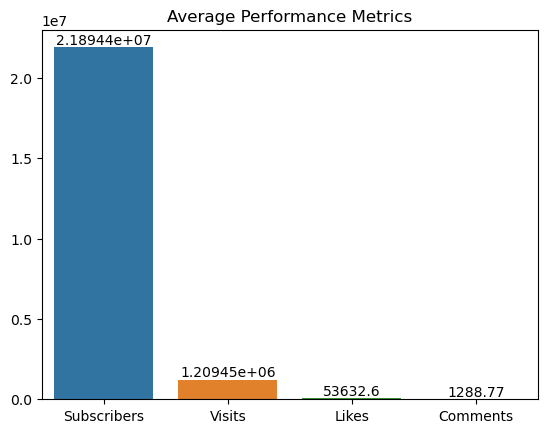

In [17]:
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
bx=sns.barplot(x=average_metrics.index,y=average_metrics.values)
bx.bar_label(bx.containers[0])
plt.title('Average Performance Metrics')
plt.show()

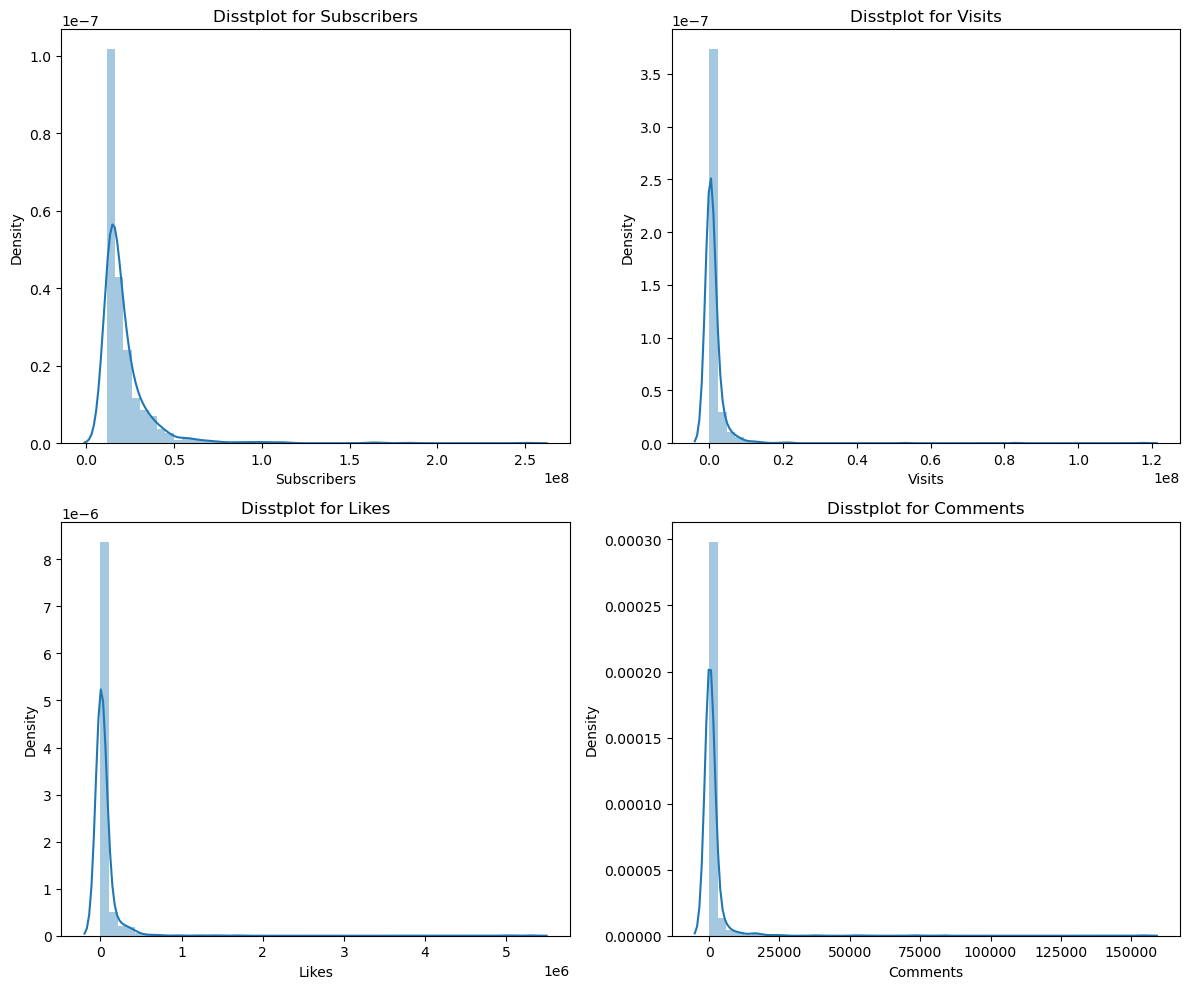

In [18]:
columns = ['Subscribers', 'Visits', 'Likes', 'Comments']


fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes = axes.flatten()


for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f'Disstplot for {col}')


plt.tight_layout()
plt.show()


### Content Categories

In [19]:
category_distribution = df['Categories'].value_counts()
print(category_distribution)

Unknow                                306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor             

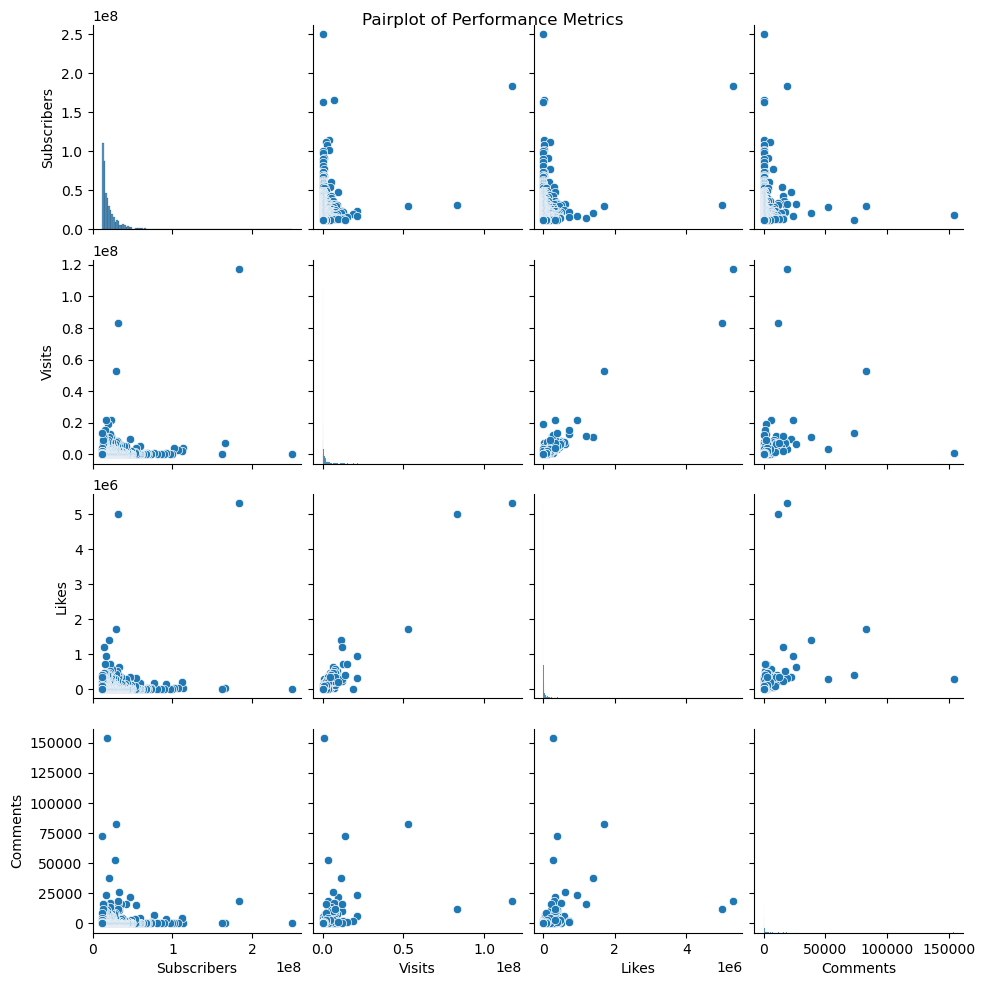

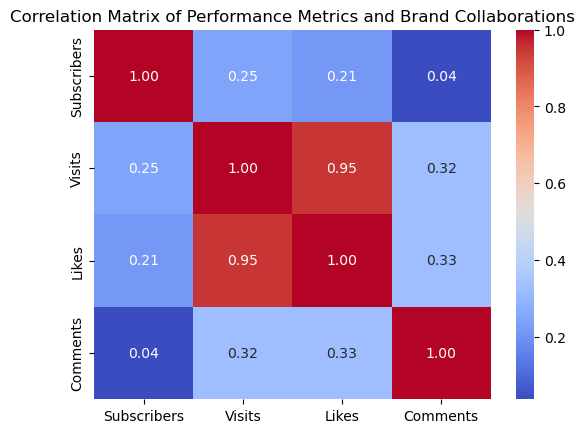

In [20]:

performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']


df.columns = [col.strip() for col in df.columns]


sns.pairplot(df, vars=performance_metrics)
plt.suptitle('Pairplot of Performance Metrics')
plt.show()

# Calculate correlation matrix
correlation_matrix = df[performance_metrics + ['Links']].corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Metrics and Brand Collaborations')
plt.show()

In [21]:
# Calculate average performance metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Subscribers'] > average_metrics['Subscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

# Display or further analyze above-average streamers
print(above_average_streamers[['Username', 'Subscribers', 'Visits', 'Likes','Comments']])

                  Username  Subscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   16500.0
100             markiplier   35500000.

### top performing content creator

In [22]:
scaler = StandardScaler()
scaled_metrics= scaler.fit_transform(df[['Subscribers', 'Visits', 'Likes', 'Comments']])
kmeans = KMeans(n_clusters=2)
df['cluster']= kmeans.fit_predict(scaled_metrics)

In [23]:
top_performers = df[df['cluster'] == 1]
top_performers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,cluster
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,1
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,1


# Conclusion

The initial exploration of the YouTube dataset revealed valuable insights into the structure and characteristics of the top 1000 YouTubers. Key observations include identifying trends in content categories, exploring audience distribution by country, and analyzing performance metrics. 